# Week 08, Graph2

- Data Load
- Network Analysis
  - small world
  - motif
  - graph role
  - community detection

# 1. data load

In [ ]:
! pip install networkx

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

## 1) data download
- karate_club_graph : https://en.wikipedia.org/wiki/Zachary's_karate_club
- https://networkx.org/documentation/stable//auto_examples/graph/plot_karate_club.html
- 데이터 설명
    - 가라테 클럽의 소셜 네트워크 : 34명의 가라테 클럽 회원의 회원 간 상호 작용 네트워크. 
    - "John A"와 강사 "Mr. Hi"(가명) 사이에 다툼이 생겨 클럽이 둘로 분할. 회원의 절반은 Hi 씨를 중심으로 신생 클럽을 결성 
    - node 0 : 강사, node 33: 클럽 관리자

Node Degree
   0     16
   1      9
   2     10
   3      6
   4      3
   5      4
   6      4
   7      4
   8      5
   9      2
  10      3
  11      1
  12      2
  13      5
  14      2
  15      2
  16      2
  17      2
  18      2
  19      3
  20      2
  21      2
  22      2
  23      5
  24      3
  25      3
  26      2
  27      4
  28      3
  29      4
  30      4
  31      6
  32     12
  33     17


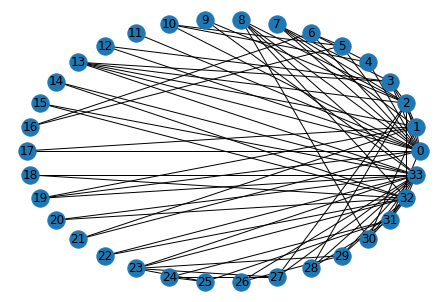

In [ ]:
g = nx.karate_club_graph()
print("Node Degree")
for v in g:
    print(f"{v:4} {g.degree(v):6}")

nx.draw_circular(g, with_labels=True)
plt.show()

In [ ]:
print(nx.info(g))

Name: Zachary's Karate Club
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


In [ ]:
g.nodes.data()

NodeDataView({0: {'club': 'Mr. Hi'}, 1: {'club': 'Mr. Hi'}, 2: {'club': 'Mr. Hi'}, 3: {'club': 'Mr. Hi'}, 4: {'club': 'Mr. Hi'}, 5: {'club': 'Mr. Hi'}, 6: {'club': 'Mr. Hi'}, 7: {'club': 'Mr. Hi'}, 8: {'club': 'Mr. Hi'}, 9: {'club': 'Officer'}, 10: {'club': 'Mr. Hi'}, 11: {'club': 'Mr. Hi'}, 12: {'club': 'Mr. Hi'}, 13: {'club': 'Mr. Hi'}, 14: {'club': 'Officer'}, 15: {'club': 'Officer'}, 16: {'club': 'Mr. Hi'}, 17: {'club': 'Mr. Hi'}, 18: {'club': 'Officer'}, 19: {'club': 'Mr. Hi'}, 20: {'club': 'Officer'}, 21: {'club': 'Mr. Hi'}, 22: {'club': 'Officer'}, 23: {'club': 'Officer'}, 24: {'club': 'Officer'}, 25: {'club': 'Officer'}, 26: {'club': 'Officer'}, 27: {'club': 'Officer'}, 28: {'club': 'Officer'}, 29: {'club': 'Officer'}, 30: {'club': 'Officer'}, 31: {'club': 'Officer'}, 32: {'club': 'Officer'}, 33: {'club': 'Officer'}})

## 2) draw graph

## Node Centrality
- degree centrality : 연결된 node가 많을 수록 큼. nx.degree_centrality(g), nx.in_degree_centrality(g), nx.out_degree_centrality(g)
- closeness centrality : 모든 node와의 거리가 가까울 수록 큼. nx.closeness_centrality(g)
- betweenness centrality : 노드 간의 경로에 있을 수록 큼. nx.betweenness_centrality(g, normalized=True)
- eigenvector centrality : 큰 네트워크와 연결되있는 사람일 수록 큼. nx.eigenvector_centrality(g)

"\npos = nx.spring_layout(g)\nbetCent = nx.eigenvector_centrality(g) #normalized=True, endpoints=True\nnode_color = [20000.0 * g.degree(v) for v in g]\nnode_size =  [v * 10000 for v in betCent.values()]\nplt.figure(figsize=(10,10))\nnx.draw_networkx(g, pos=pos, with_labels=False,\n                 node_color=node_color,\n                 node_size=node_size )\nplt.axis('off')\n"

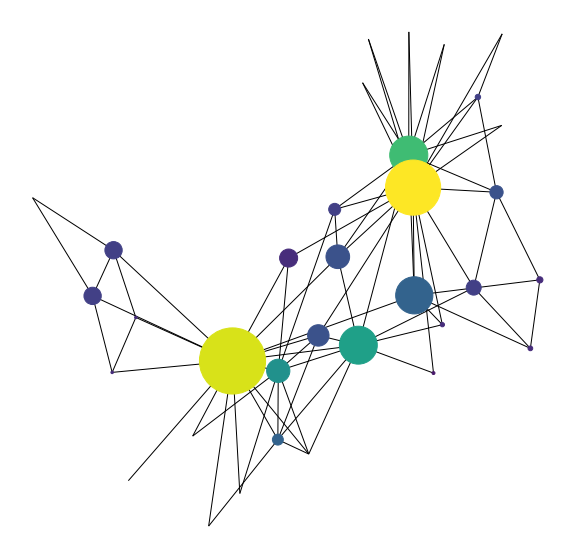

In [ ]:
#visualize the network such that the node color varies with Degree and node size with Betweenness Centrality.

pos = nx.spring_layout(g)
betCent = nx.betweenness_centrality(g,normalized=True)
node_color = [20000.0 * g.degree(v) for v in g]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(10,10))
nx.draw_networkx(g, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

'''
pos = nx.spring_layout(g)
betCent = nx.eigenvector_centrality(g) #normalized=True, endpoints=True
node_color = [20000.0 * g.degree(v) for v in g]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(10,10))
nx.draw_networkx(g, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')
'''

In [ ]:
'''
betCent = nx.eigenvector_centrality(g)
sorted(betCent.items(), key = (lambda x: x[1]), reverse=True)

'''
betCent = nx.betweenness_centrality(g, normalized=True, endpoints=True)
sorted(betCent.items(), key = (lambda x: x[1]), reverse=True)

[(0, 0.4707155589508531),
 (33, 0.34501174207056556),
 (32, 0.19552669552669552),
 (2, 0.19402993520640582),
 (31, 0.18896528308293015),
 (8, 0.111460543813485),
 (1, 0.1095874713521772),
 (13, 0.10198907845966672),
 (19, 0.08938828056475116),
 (5, 0.08704693998811645),
 (6, 0.08704693998811644),
 (27, 0.07984325043148571),
 (23, 0.07540106951871657),
 (30, 0.07238774297597828),
 (3, 0.07003225532637297),
 (25, 0.06243810655575361),
 (29, 0.06157372039724981),
 (24, 0.06090314913844326),
 (28, 0.06051268992445463),
 (9, 0.05962142432730668),
 (4, 0.059417706476530004),
 (10, 0.05941770647653),
 (7, 0.058823529411764705),
 (11, 0.058823529411764705),
 (12, 0.058823529411764705),
 (14, 0.058823529411764705),
 (15, 0.058823529411764705),
 (16, 0.058823529411764705),
 (17, 0.058823529411764705),
 (18, 0.058823529411764705),
 (20, 0.058823529411764705),
 (21, 0.058823529411764705),
 (22, 0.058823529411764705),
 (26, 0.058823529411764705)]

# 2. Network Analysis
- degree, centrality 등은 5주차 [lab]graph1 참고

## 1) Small world
- reference : https://networkx.org/documentation/stable/reference/algorithms/smallworld.html
- sigma = C/Cr / L/Lr
- C and L are respectively the average clustering coefficient and average shortest path length of G. 
- Cr and Lr are respectively the average clustering coefficient and average shortest path length of an equivalent random graph.
- A graph is commonly classified as small-world if sigma>1.

In [ ]:
from networkx.algorithms import smallworld as sw

In [ ]:
g_random = sw.random_reference(g, niter=20, seed=2021) #randomness을 얼마나 줄 것인지 : n iter
print(nx.info(g_random))

Name: Zachary's Karate Club
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


In [ ]:
print(nx.info(g))

Name: Zachary's Karate Club
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


In [ ]:
C = nx.average_clustering(g) #clustering coefficent
L = nx.average_shortest_path_length(g) #최단거리

In [ ]:
Cr = nx.average_clustering(g_random)
Lr = nx.average_shortest_path_length(g_random)

In [ ]:
A = (C / Cr)
B = (L / Lr)

In [ ]:
sigma =  A / B
sigma #sigma값이 1이상이면 small world가 맞다다

1.8098655257760567

In [ ]:
sw_sigma = sw.sigma(g, niter=20, seed=2021)
sw_sigma

1.1400895551524715

## 2) motif

In [ ]:
# https://pypi.org/project/netsci/
! pip install netsci

     |████████████████████████████████| 450kB 9.2MB/s 


In [ ]:
import numpy as np
import netsci.visualization as nsv
import netsci.metrics.motifs as nsm

In [ ]:
# networkx to numpy
g_np = nx.convert_matrix.to_numpy_matrix(g,dtype=np.integer)
g_r_np = nx.convert_matrix.to_numpy_matrix(g_random,dtype=np.integer)

print(g_np.shape,g_r_np.shape)

(34, 34) (34, 34)


In [ ]:
# recurring : count subgraphs
f_real = nsm.motifs(g_np)[3:]
f_random = nsm.motifs(g_r_np)[3:]
print(f_real)
print(f_random)

[  0   0   0   0   0   0   0 393   0   0   0   0  45]
[  0   0   0   0   0   0   0 411   0   0   0   0  39]


[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13]


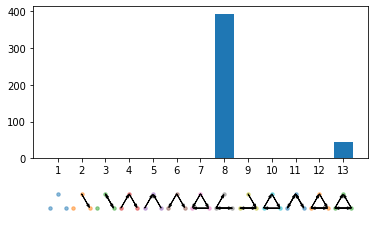

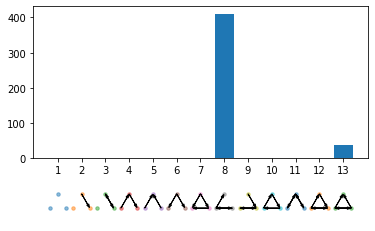

In [ ]:
# visualization of motifs
nsv.bar_motifs(f_real)
nsv.bar_motifs(f_random)

## 3) graph role
- reference: https://github.com/dkaslovsky/GraphRole
- https://pypi.org/project/graphrole/

In [ ]:
! pip install graphrole

     |████████████████████████████████| 6.8MB 5.4MB/s 
     |████████████████████████████████| 10.5MB 42.9MB/s 
     |████████████████████████████████| 25.9MB 112kB/s 
     |████████████████████████████████| 14.5MB 344kB/s 
     |████████████████████████████████| 1.6MB 44.7MB/s 
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.19.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.

In [ ]:
from pprint import pprint
import seaborn as sns

from graphrole import RecursiveFeatureExtractor, RoleExtractor

ImportError: ignored

In [ ]:
# extract features
feature_extractor = RecursiveFeatureExtractor(g)
features = feature_extractor.extract_features()

In [ ]:
print(features)

    external_edges(mean)(mean)  degree(mean)  ...  external_edges  internal_edges
0                    19.637500      4.312500  ...              17              34
1                    22.422685      5.777778  ...              19              21
2                    25.537083      6.600000  ...              34              21
3                    23.717361      7.666667  ...              20              16
4                    17.979167      7.666667  ...              16               5
5                    17.234375      6.250000  ...              15               7
6                    17.234375      6.250000  ...              15               7
7                    26.342708     10.250000  ...              25              10
8                    27.214363     11.800000  ...              44              10
9                    28.108824     13.500000  ...              25               2
10                   17.979167      7.666667  ...              16               5
11              

In [ ]:
# assign node roles
role_extractor = RoleExtractor(n_roles=None)
role_extractor.extract_role_factors(features)
node_roles = role_extractor.roles

In [ ]:
print('\nNode role assignments:')
pprint(node_roles)

print('\nNode role membership by percentage:')
print(role_extractor.role_percentage.round(2))


Node role assignments:
{0: 'role_3',
 1: 'role_0',
 2: 'role_2',
 3: 'role_0',
 4: 'role_1',
 5: 'role_1',
 6: 'role_1',
 7: 'role_1',
 8: 'role_2',
 9: 'role_1',
 10: 'role_1',
 11: 'role_1',
 12: 'role_1',
 13: 'role_2',
 14: 'role_1',
 15: 'role_1',
 16: 'role_4',
 17: 'role_1',
 18: 'role_1',
 19: 'role_2',
 20: 'role_1',
 21: 'role_1',
 22: 'role_1',
 23: 'role_2',
 24: 'role_4',
 25: 'role_4',
 26: 'role_1',
 27: 'role_2',
 28: 'role_1',
 29: 'role_1',
 30: 'role_1',
 31: 'role_2',
 32: 'role_0',
 33: 'role_0'}

Node role membership by percentage:
    role_0  role_1  role_2  role_3  role_4
0     0.32    0.05    0.01    0.57    0.05
1     0.67    0.13    0.13    0.01    0.06
2     0.37    0.01    0.49    0.05    0.09
3     0.50    0.21    0.21    0.01    0.06
4     0.11    0.64    0.02    0.22    0.02
5     0.02    0.46    0.02    0.46    0.02
6     0.02    0.46    0.02    0.46    0.02
7     0.09    0.56    0.02    0.32    0.02
8     0.15    0.04    0.65    0.01    0.15
9     0.1

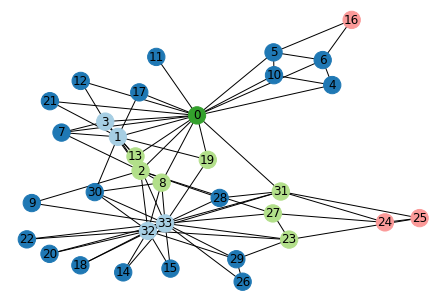

In [ ]:
# build color palette for plotting
unique_roles = sorted(set(node_roles.values()))
color_map = sns.color_palette('Paired', n_colors=len(unique_roles))
# map roles to colors
role_colors = {role: color_map[i] for i, role in enumerate(unique_roles)}
# build list of colors for all nodes in G
node_colors = [role_colors[node_roles[node]] for node in g.nodes]

# plot graph
plt.figure()
nx.draw(
    g,
    pos=nx.spring_layout(g, seed=42),
    with_labels=True,
    node_color=node_colors,
)
plt.show()

## 4) Community Detection

In [ ]:
from networkx.algorithms import community
list(community.asyn_fluidc(g,k=2))

[{9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33},
 {0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 16, 17, 19, 21, 30}]

In [ ]:
g.nodes.data()

NodeDataView({0: {'club': 'Mr. Hi'}, 1: {'club': 'Mr. Hi'}, 2: {'club': 'Mr. Hi'}, 3: {'club': 'Mr. Hi'}, 4: {'club': 'Mr. Hi'}, 5: {'club': 'Mr. Hi'}, 6: {'club': 'Mr. Hi'}, 7: {'club': 'Mr. Hi'}, 8: {'club': 'Mr. Hi'}, 9: {'club': 'Officer'}, 10: {'club': 'Mr. Hi'}, 11: {'club': 'Mr. Hi'}, 12: {'club': 'Mr. Hi'}, 13: {'club': 'Mr. Hi'}, 14: {'club': 'Officer'}, 15: {'club': 'Officer'}, 16: {'club': 'Mr. Hi'}, 17: {'club': 'Mr. Hi'}, 18: {'club': 'Officer'}, 19: {'club': 'Mr. Hi'}, 20: {'club': 'Officer'}, 21: {'club': 'Mr. Hi'}, 22: {'club': 'Officer'}, 23: {'club': 'Officer'}, 24: {'club': 'Officer'}, 25: {'club': 'Officer'}, 26: {'club': 'Officer'}, 27: {'club': 'Officer'}, 28: {'club': 'Officer'}, 29: {'club': 'Officer'}, 30: {'club': 'Officer'}, 31: {'club': 'Officer'}, 32: {'club': 'Officer'}, 33: {'club': 'Officer'}})